In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
# Load the dataset
dataset = pd.read_csv('tweets.csv')

In [7]:
# Display the first few rows of the dataset
print("First five rows of the dataset:")
dataset.head()

First five rows of the dataset:


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [8]:
# Checking the basic information about the dataset
print("Dataset Information:")
dataset.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [9]:
# Checking for missing values
print("Missing values in the dataset:")
missing_values = dataset.isnull().sum()
print(missing_values)

Missing values in the dataset:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


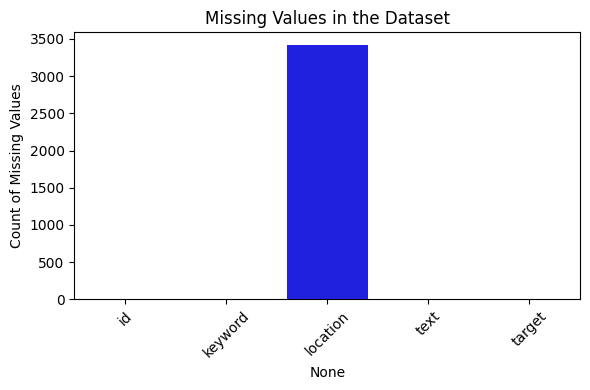

In [12]:
# Visualizing the missing data with proper usage of seaborn
plt.figure(figsize=(6,4))
sns.barplot(x=missing_values.index, y=missing_values.values, color='b')
plt.title('Missing Values in the Dataset')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Data Cleaning
# Handling missing values in the 'location' column (You can choose to fill or drop them)
dataset['location'].fillna('Unknown', inplace=True)

In [14]:
# Dropping rows with missing 'keyword' or 'text' if necessary
dataset.dropna(subset=['keyword', 'text'], inplace=True)

In [15]:
# Basic Text Preprocessing (removing URLs, converting to lowercase, etc.)
import re

In [16]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower().strip()  # Convert to lowercase and strip whitespaces
    return text

In [17]:
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

In [19]:
#Exploring the dataset

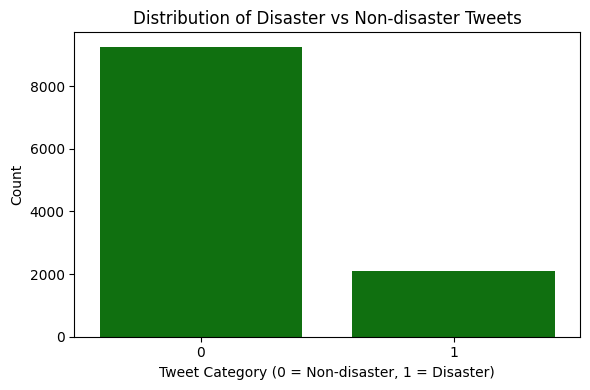

In [20]:
# Plotting the distribution of disaster vs non-disaster tweets
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=dataset, color='g')  # 'g' stands for green, can be changed to any other color
plt.title('Distribution of Disaster vs Non-disaster Tweets')
plt.xlabel('Tweet Category (0 = Non-disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

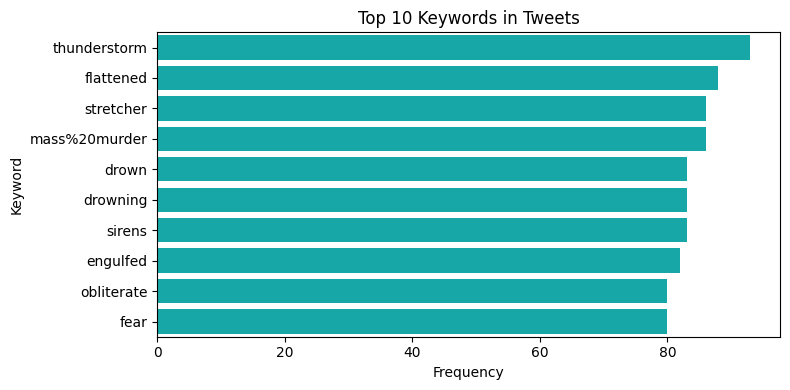

In [22]:
# Visualizing the top 10 keywords
plt.figure(figsize=(8,4))
sns.barplot(x=top_keywords.values, y=top_keywords.index, color='c')  # 'c' stands for cyan, change as needed
plt.title('Top 10 Keywords in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

In [24]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 861.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 843.3 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 950.3 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 976.4 kB/s eta 0:00:00


In [26]:
import nltk
nltk.download('punkt')  # Required for word tokenization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize the cleaned text
dataset['tokens'] = dataset['cleaned_text'].apply(word_tokenize)

# Create a list of all tokens
all_tokens = [word for tokens in dataset['tokens'] for word in tokens]

# Get the most common words
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(10)

# Plot the most common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(8,4))
sns.barplot(x='Frequency', y='Word', data=common_words_df, color='m')  # 'm' stands for magenta
plt.title('Top 10 Most Common Words in Tweets')
plt.tight_layout()
plt.show()


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Hp/nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [31]:
# Save the cleaned dataset to a new CSV file
dataset.to_csv('cleaned_tweets.csv', index=False)